# Seattle Kids in Urban Centers

## Problem Statement:

## Background
Welcome to Seattle, the big city with a small town feeling.  Though Seattle is by all acounts a major metropolitan area, the small neighborhood focus of the city lends to a small town feeling.  Across the city there are 32 'urban villages' which act as mini-downtowns.  These higher-density urban areas within the city are not accidental but the reuslt of an approach to focus development in specific areas of the city.  The areas targeted for development are typically along major corridors with transportation.  This approach avoids rezoning large fractions of residential land currently slated for single-family housing only.  (add citation) Today, most of the residential land in the city remains zoned exclusively for single-family homes and most developable land in these areas has been used.  (add citation)  

In July 2019, the city enacted legislation allowing the construction of accessory dwelling units (ADUs) on single-family zoned property. (add citation) This change was enacted to help with the severe housing affordability crisis the city was facing.  While ADUs were constructed in record numbers (add citation) the housing crisis continues and the city is currently examining zoning restrictions in all areas of the city on a neighborhood-by-neighborhood basis.  This rezoning has focused on the urban centers and villages 

The city of Seattle has seen immense population growth over the last twenty years.  While most residential land in the city has been zoned for single-family housing the explosive growth of the last two decades has resulted in significant growth in the more urban areas of the city.  The city designates these areas as 32 individual 'Urban Centers and Villages' (UCV).  The UCVs are subject to different zoning than the surrounding neighborhood and are considered targets for dense development including multi-family (e.g, high-rise apartments) as well as mixed-used residential/commercial.  

Enrollment Seattle Public Schools (SPS) has seen a lot of changes over the same time period.  The relative young average age combined with millenials generally delaying life milestones compared to previous generations led to a decline in per capita children population during the early 2000s.  (add citation) But the millenial generation is aging and the number of children in the city is rising significantly.  In 2019, in response to the rising student population, SPS reopened a high school on the north end that had been closed for 38 years. With rapidly changing demographics, the city has been slow to respond to the growing need for schools in more urban parts of the city.  This includes the high density areas in South Seattle as well as the downtown core.  The prevailing attitude is that "people don't have children in apartments" or more explictly, "people don't want to have children in apartments."  The experiences of families living in multifamily housing have been summarily dismissed as unpalatable.   



## Data Collection

To model enrollment based on population we needed population data and enrollment data.  

Population data was available from several sources.  We selected the data provided by the City of Seattle data as it was already aggreggated into the city-designated Urban Centers and Villages.  This data was available in both pdf reports and csv files from the city's main data portal.  Population data was retrieved from the city of Seattle [population data website](https://www.seattle.gov/opcd/population-and-demographics/decennial-census) on December 5, 2021. These reports are based on early results from the 2020 census, aggregated by city-designated urban centers (subset of the city) as well as by larger neighborhood areas (covering entire city).  

Enrollment data is available directly from the Seattle Public School district.  The data is provided in pdfs covering individual years along with comparison to overall enrollment in prior year.  Enrollment data was retrieved from [Seattle Public Schools](https://www.seattleschools.org/departments/enrollment-planning/enrollment-data/annual-enrollment-reports/) on December 5, 2021.  The enrollment data 

## Data Cleaning

The population data was provided in easily readable csv files.  Data cleaning consisted of verifying the data was imported correctly, removing features that would not be used and renaming features to increase readability.  

The total enrollment data was provided in pdfs.  With the exception of the 2016 report, the individual school enrollment was listed in tabular format and was copied from the reports.  The 2016 report did not contain the same breakdown but the data can be obtained from the 2017 which shows comparison with previous year.  Each table spans three pages of hte pdf and several fixable formatting issues cropped up during transfer. The process was overall straightforward with only minor data manipulation required to fix merged cell data that was not transfered properly.  Data was spot checked for inconsistencies in both formatting and numerical values.  Column totals were compared to the totals given in the pdf with only one error that appears to be a typo in the pdf version.  

The grade level enrollment, however, was provided in graphical format only with each report covering the last five years.  (Grade-level enrollment was transfered by hand to an Excel file which was compared to the numbers in each report.  This meant that the hand typed values were checked multiple times as the reporting years overlap. QUESTION: DO I WANT TO USE THAT OR DO I WANT TO SUM THE VALUES?  CHECK THE K-8 DATA FIRST...)



In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Population Data

In [2]:
# get population data
ucvpop = pd.read_csv("./data/citydata/Urban_Centers_and_Villages_with_PL_94-171_Redistricting__Data_for_1990-2020.csv")
ucvpop.set_index('OBJECTID', inplace = True)
ucvpop.head()

,NEIGH_NO,NEIGH_NAME,UV_TYPE,TYPE_NAME,AREA_ACRES,F1990_PL_data_TOT_POP,F1990_PL_data_WHITE_NOT,F1990_PL_data_BLACK_NOT,F1990_PL_data_AMI_NOT,F1990_PL_data_ASIAN_NOT,...,F1990_PL_data_GQ_I,F1990_PL_data_GQ_N_I,F2000_PL_data_GQ_I,F2000_PL_data_GQ_N_I,F2010_PL_data_GQ_I,F2010_PL_data_GQ_N_I,F2020_PL_data_GQ_I,F2020_PL_data_GQ_N_I,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,106,Upper Queen Anne,RUV,Residential Urban Village,52.658720,1921,1715,56,11,71,...,0,37,0,0,0,4,0,0,2.293805e+06,11354.22008
2,302,Fremont,HUV,Hub Urban Village,214.511083,3153,2697,90,64,189,...,0,47,0,63,0,90,0,66,9.344065e+06,16236.22258
3,205,West Seattle Junction,HUV,Hub Urban Village,270.417026,3627,3169,145,33,150,...,401,14,358,13,272,0,235,12,1.177932e+07,20674.93070
4,111,Columbia City,RUV,Residential Urban Village,334.543340,4281,898,1827,111,1269,...,0,5,98,7,95,20,102,80,1.457265e+07,25210.67846
5,414,First Hill/Capitol Hill,UC,Urban Center,916.221801,28940,21504,3037,534,2403,...,660,1370,782,2278,332,2329,846,3135,3.991046e+07,31324.33554


In [3]:
print('UCV data shape:', ucvpop.shape)

UCV data shape: (32, 110)


In [4]:
print('nulls in UCV population data:', ucvpop.isna().sum().sum())

nulls in UCV population data: 0


The UCV data has no nulls.  We have 110 columns for each of the 32 Urban Centers/Villages

In [5]:
# get population data
pop = pd.read_csv('./data/citydata/Community_Reporting_Areas_with_PL_94-171_Redistricting__Data_for_1990-2020.csv')
pop.set_index('OBJECTID', inplace= True)
pop.head()

,NEIGH_NO,NEIGH_NAME,DETL_NAMES,NEIGHDIST_NO,NEIGHDIST_NAME,AREA_ACRES,AREA_SQMI,F1990_PL_data_TOT_POP,F1990_PL_data_WHITE_NOT,F1990_PL_data_BLACK_NOT,...,F1990_PL_data_GQ_I,F1990_PL_data_GQ_N_I,F2000_PL_data_GQ_I,F2000_PL_data_GQ_N_I,F2010_PL_data_GQ_I,F2010_PL_data_GQ_N_I,F2020_PL_data_GQ_I,F2020_PL_data_GQ_N_I,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1.1,Arbor Heights,"Arbor Heights, Brace Point, Endolyne, Arroyo",1,Southwest,785.9,1.23,6247,5603,79,...,0,0,0,8,5,3,0,5,3.423387e+07,27702.727646
2,1.2,Fauntleroy/Seaview,"Fauntleroy, Gatewood, Morgan Junction, Lincoln...",1,Southwest,1393.1,2.18,12919,11746,261,...,122,23,103,9,86,25,53,48,6.068510e+07,48830.048317
3,1.3,West Seattle Junction/Genesee Hill,"Seaview, Fairmount Park, Morgan Junction, Gene...",1,Southwest,1447.5,2.26,16017,14607,249,...,504,0,431,0,350,20,299,94,6.305462e+07,38739.896257
4,1.4,Alki/Admiral,"Alki, Admiral",1,Southwest,898.3,1.40,9880,9212,82,...,143,3,101,0,107,24,149,33,3.912974e+07,50339.656415
5,2.1,North Delridge,"North Delridge, Pigeon Point, Avalon, Luna Par...",2,Delridge Neighborhoods,1606.9,2.51,3724,2844,315,...,0,84,0,49,1,16,0,52,6.999494e+07,64237.742682


In [6]:
print('citywide population data shape:',pop.shape)

citywide population data shape: (53, 112)


In [7]:
print('nulls in citywide population data:',pop.isna().sum().sum())

nulls in citywide population data: 0


The broader neighborhood data has no nulls.  It is broken down into 53 neighborhoods spanning the entire city with 112 data columns for each neighborhood.

## First look at overall population changes
Adding a `change` feature that represents the change in population from 2010 to 2020 and a `perc_change` that represents the percentage change in population from 2010 to 2020

In [8]:
ucvpop['change'] = ucvpop['F2020_PL_data_TOT_POP'] - ucvpop['F2010_PL_data_TOT_POP']
pop['change'] = pop['F2020_PL_data_TOT_POP'] - pop['F2010_PL_data_TOT_POP']

In [9]:
ucvpop['perc_change'] = (ucvpop['F2020_PL_data_TOT_POP'] - ucvpop['F2010_PL_data_TOT_POP'])/ucvpop['F2010_PL_data_TOT_POP']
pop['perc_change'] = (pop['F2020_PL_data_TOT_POP'] - pop['F2010_PL_data_TOT_POP'])/pop['F2010_PL_data_TOT_POP']

In [10]:
ucvpop[['NEIGH_NAME', 'AREA_ACRES','F2010_PL_data_TOT_POP','F2020_PL_data_TOT_POP', 'change', 'perc_change']].sort_values('perc_change', ascending=False).head()

,NEIGH_NAME,AREA_ACRES,F2010_PL_data_TOT_POP,F2020_PL_data_TOT_POP,change,perc_change
OBJECTID,,,,,,
7,South Lake Union,339.886927,3774,12905,9131,2.419449
3,West Seattle Junction,270.417026,5043,9160,4117,0.816379
6,Roosevelt,170.211776,2616,4678,2062,0.788226
12,Greater Duwamish,4953.281793,1064,1836,772,0.725564
4,Columbia City,334.543340,4609,7661,3052,0.662183


In [11]:
pop[['NEIGH_NAME', 'AREA_ACRES','F2010_PL_data_TOT_POP','F2020_PL_data_TOT_POP', 'change', 'perc_change']].sort_values('perc_change', ascending=False).head()

,NEIGH_NAME,AREA_ACRES,F2010_PL_data_TOT_POP,F2020_PL_data_TOT_POP,change,perc_change
OBJECTID,,,,,,
47,Cascade/Eastlake,727.6,13526,29182,15656,1.157474
44,Ballard,492.9,6739,11191,4452,0.660632
12,Duwamish/SODO,2343.5,2354,3611,1257,0.533985
21,Judkins Park,202.9,2925,4284,1359,0.464615
52,Downtown Commercial Core,206.5,4070,5813,1743,0.428256


In [12]:
print('UCV population:',sum(ucvpop['F2020_PL_data_TOT_POP']))
print('Total population:',sum(pop['F2020_PL_data_TOT_POP']))
print('UCV population fraction', round(sum(ucvpop['F2020_PL_data_TOT_POP'])/sum(pop['F2020_PL_data_TOT_POP']),3))

UCV population: 308307
Total population: 737015
UCV population fraction 0.418


In [13]:
print('UCV area (acres):',sum(ucvpop['AREA_ACRES']))
print('Total area (acres):',sum(pop['AREA_ACRES']))
print('UCV area fraction', round(sum(ucvpop['AREA_ACRES'])/sum(pop['AREA_ACRES']),3))

UCV area (acres): 16016.586737009999
Total area (acres): 53560.99999999999
UCV area fraction 0.299


In 2020, approximately 41.8% of the city population lived in an urban center or village while the urban villages only accounted for 29.9% of the city acreage.

In [14]:
# growth 2010-2020
print('All-ages population growth from 2010 to 2020')
print('UCV population growth:',(sum(ucvpop['F2020_PL_data_TOT_POP'])-sum(ucvpop['F2010_PL_data_TOT_POP'])))
print('Overall population growth:',(sum(pop['F2020_PL_data_TOT_POP'])-sum(pop['F2010_PL_data_TOT_POP'])))
print()
print('All-ages population growth rate from 2010 to 2020')
print('UCV population growth:',(sum(ucvpop['F2020_PL_data_TOT_POP'])-sum(ucvpop['F2010_PL_data_TOT_POP']))/sum(ucvpop['F2010_PL_data_TOT_POP']))
print('Overall population growth:',(sum(pop['F2020_PL_data_TOT_POP'])-sum(pop['F2010_PL_data_TOT_POP']))/sum(pop['F2010_PL_data_TOT_POP']))

All-ages population growth from 2010 to 2020
UCV population growth: 87281
Overall population growth: 128355

All-ages population growth rate from 2010 to 2020
UCV population growth: 0.3948901939138382
Overall population growth: 0.21088128018926822


## Kids

In [15]:
print('\nKids in UCVs\n')
print('2010 ',sum(ucvpop['F2010_PL_data_POP_UNDER_18']))
print('2020 ',sum(ucvpop['F2020_PL_data_POP_UNDER_18']))


Kids in UCVs

2010  21895
2020  27108


In [16]:
print('\nKids in entire city\n')
print('2010 ', sum(pop['F2010_PL_data_POP_UNDER_18']))
print('2020 ', sum(pop['F2020_PL_data_POP_UNDER_18']))


Kids in entire city

2010  93513
2020  106841


In [17]:
print("Fractional change in CHILD population in UCVs",
      round((sum(ucvpop['F2020_PL_data_POP_UNDER_18']) - 
             sum(ucvpop['F2010_PL_data_POP_UNDER_18']))/sum(ucvpop['F2010_PL_data_POP_UNDER_18']),
            3))
print()
print("Fractional change in CHILD population in entire city",
      round((sum(pop['F2020_PL_data_POP_UNDER_18']) - 
             sum(pop['F2010_PL_data_POP_UNDER_18']))/sum(pop['F2010_PL_data_POP_UNDER_18'])
            ,3), '\n')


Fractional change in CHILD population in UCVs 0.238

Fractional change in CHILD population in entire city 0.143 



In [18]:
print("Fractional change in ADULT population in UCVs", 
      round((sum(ucvpop['F2020_PL_data_POP_OVER_18']) - 
             sum(ucvpop['F2010_PL_data_POP_OVER_18']))/sum(ucvpop['F2010_PL_data_POP_OVER_18'])
            ,3))
print()
print("Fractional change in ADULT population in entire city",
      round((sum(pop['F2020_PL_data_POP_OVER_18']) - 
             sum(pop['F2010_PL_data_POP_OVER_18']))/sum(pop['F2010_PL_data_POP_OVER_18'])
            ,3),'\n')

Fractional change in ADULT population in UCVs 0.412

Fractional change in ADULT population in entire city 0.223 



In [19]:
# growth 2010-2020
print('Child population growth from 2010 to 2020')
print('UCV:     ', (sum(ucvpop['F2020_PL_data_POP_UNDER_18'])
                    - sum(ucvpop['F2010_PL_data_POP_UNDER_18'])))
print('Citywide:', (sum(pop['F2020_PL_data_POP_UNDER_18'])
                    - sum(pop['F2010_PL_data_POP_UNDER_18'])))
print()
print('Child population growth rate from 2010 to 2020')
print('UCV:     ', round((sum(ucvpop['F2020_PL_data_POP_UNDER_18'])
                          - sum(ucvpop['F2010_PL_data_POP_UNDER_18']))
                         / sum(ucvpop['F2010_PL_data_POP_UNDER_18']),3))
print('Citywide:', round((sum(pop['F2020_PL_data_POP_UNDER_18'])
                          - sum(pop['F2010_PL_data_POP_UNDER_18']))
                         / sum(pop['F2010_PL_data_POP_UNDER_18']),3))

Child population growth from 2010 to 2020
UCV:      5213
Citywide: 13328

Child population growth rate from 2010 to 2020
UCV:      0.238
Citywide: 0.143


From 2010 to 2020 the city as a whole saw an increase of 14.3% in the population of children.  Urban centers and villages as a whole saw a 23.8% rise in the child population over the same time period

Both UCVs and the city as a whole saw a larger fractional change in the adult population than in the child population.  The UCV adult population grew by 41.2% while the total adult population grew by 22.3% from 2010 to 2020.

In [20]:
ucvkids = ucvpop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in ucvpop.columns if 'UNDER' in col]]
kids = pop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in pop.columns if 'UNDER' in col]]

ucvadults = ucvpop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in ucvpop.columns if 'OVER' in col]]
adults = pop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in pop.columns if 'OVER' in col]]

In [21]:
ucvkids.columns = ['neighborhood','neighborhood_no','area','1990','2000','2010','2020']

In [22]:
ucvkids = ucvkids.copy()

In [23]:
ucvkids[ucvkids['neighborhood']=='Uptown']

,neighborhood,neighborhood_no,area,1990,2000,2010,2020
OBJECTID,,,,,,,
20,Uptown,412,333.000698,172,147,222,596


In [24]:

ucvkids['change'] = ucvkids['2020']-ucvkids['2010']

In [25]:
ucvkids['frac_change'] = (ucvkids['2020']-ucvkids['2010'])/ucvkids['2010']

In [26]:
ucvkids['density'] = ucvkids['2020']/ucvkids['area']

In [27]:
ucvkids.sort_values('frac_change', ascending=False)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243
17,Ballard-Interbay-Northend,501,931.972864,107,66,67,205,138,2.059701,0.219963
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
8,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741
12,Greater Duwamish,502,4953.281793,148,213,135,245,110,0.814815,0.049462
28,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348
14,Green Lake,207,107.444638,103,94,163,265,102,0.625767,2.466386
2,Fremont,302,214.511083,266,171,215,339,124,0.576744,1.580338


In [28]:
ucvkids.sort_values('2020', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706
22,23rd & Union-Jackson,109,625.266413,2036,2103,1813,1902,89,0.049090,3.041903
5,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963
30,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884
24,Mt Baker,305,491.018058,931,1016,1046,1072,26,0.024857,2.183219
10,Westwood-Highland Park,127,275.062196,970,1091,1093,947,-146,-0.133577,3.442858


In [29]:
ucvkids.sort_values('frac_change', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243
17,Ballard-Interbay-Northend,501,931.972864,107,66,67,205,138,2.059701,0.219963
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
8,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741
12,Greater Duwamish,502,4953.281793,148,213,135,245,110,0.814815,0.049462
28,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348
14,Green Lake,207,107.444638,103,94,163,265,102,0.625767,2.466386
2,Fremont,302,214.511083,266,171,215,339,124,0.576744,1.580338


In [30]:
ucvkids.sort_values('change', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963
8,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243
30,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786
23,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744
3,West Seattle Junction,205,270.417026,413,434,438,677,239,0.545662,2.503541
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884


In [31]:
ucvkids.sort_values('density', ascending = False)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963
11,Lake City,201,142.267043,253,394,507,622,115,0.226824,4.372060
18,Greenwood-Phinney Ridge,102,94.157645,260,355,374,410,36,0.096257,4.354399
1,Upper Queen Anne,106,52.658720,125,126,136,201,65,0.477941,3.817032
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884
10,Westwood-Highland Park,127,275.062196,970,1091,1093,947,-146,-0.133577,3.442858
9,Crown Hill,103,270.988754,579,644,747,927,180,0.240964,3.420806
13,Madison-Miller,131,145.323420,480,334,450,482,32,0.071111,3.316740


Ballard-Interbay-Northend and Greater Duwamish are density outliers.  Both of these districts are huge industrial areas of the city that are covered in the urban village development plan.  

Ballard-Interbay-Northend includes the former WA National Guard site recently given over to the city.  Redeveloment options for this area are currently being explored by a legislatively appointed [advisory council](https://www.commerce.wa.gov/about-us/research-services/interbay-public-development-advisory-committee/).  

Greater Duwamish is the area including the port of Seattle.  

For the purpose of current data we can exclude them from the residential population analysis as they are mainly industrial rather than mixed-use, residential/commerical areas.  



In [32]:
#dropping Ballard-Interbay-Northend and Greater Duwamish areas
ucvkids.drop(index = 12, inplace = True)
ucvkids.drop(index = 17, inplace = True)

In [33]:
# saving urban center kid data
ucvkids.to_csv('./data/seattle_ucv_kids_cleaned.csv')

Inconsistency in definition of Urban villages and urban centers leads to oddities in the density values.  Uptown, Downtown, South Lake Union and First Hill/Capitol Hill create a contiguous block.  That is, the entirety of central Seattle is in one of these UCVs, even though there are vast variations in density inside each of the UCVs.

The definition of UCV boundaries for those outside of central Seattle are much tighter, owing to strict zoning laws and the fight against expansion of non-single family housing.  Development in these areas has been limited to directly along the main thoroughfare with the urban center/village defined as such.  This leads to misleadingly high densities for these neighborhoods.  

Furthermore if we look at each of the Urban centers outside of central Seattle, they are all in close proximity to at least one if not several elementary schools.  

Kids experiencing homeless are often considered residents of the Downtown UCVand are transported to Capitol Hill for school.  This is in part due to the concentration of shelters in the downtown area. (add citation) In 2017, 20% of students at the Lowell Elementary were experiencing homelessness.  This 



In [34]:
ucvkids['change2000to2010'] = ucvkids['2010']-ucvkids['2000']

In [35]:
ucvkids.sort_values('change2000to2010', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010
OBJECTID,,,,,,,,,,,
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671
29,Wallingford,203,258.005613,448,477,701,839,138,0.196862,3.251867,224
23,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744,201
15,Northgate,301,412.291123,439,685,826,862,36,0.043584,2.090756,141
13,Madison-Miller,131,145.323420,480,334,450,482,32,0.071111,3.316740,116
11,Lake City,201,142.267043,253,394,507,622,115,0.226824,4.372060,113
9,Crown Hill,103,270.988754,579,644,747,927,180,0.240964,3.420806,103
28,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348,86
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75


In [36]:
ucvkids['perc_change2000to2010'] = ucvkids['change2000to2010']/ucvkids['2000']

In [37]:
ucvkids.sort_values('perc_change2000to2010',ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010
OBJECTID,,,,,,,,,,,,
28,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348,86,0.741379
14,Green Lake,207,107.444638,103,94,163,265,102,0.625767,2.466386,69,0.734043
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75,0.510204
23,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744,201,0.507576
29,Wallingford,203,258.005613,448,477,701,839,138,0.196862,3.251867,224,0.469602
13,Madison-Miller,131,145.323420,480,334,450,482,32,0.071111,3.316740,116,0.347305
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671,0.321360
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082
11,Lake City,201,142.267043,253,394,507,622,115,0.226824,4.372060,113,0.286802


In [38]:
# neighborhoods with largest number of kids in 2020
ucvkids.sort_values('2020', ascending=False).head()

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010
OBJECTID,,,,,,,,,,,,
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671,0.321360
22,23rd & Union-Jackson,109,625.266413,2036,2103,1813,1902,89,0.049090,3.041903,-290,-0.137898
5,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185,-95,-0.050505
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747


In [39]:
#neighborhoods with largest change in number of kids from 2010 to 2020
ucvkids.sort_values('change', ascending=False).head()

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010
OBJECTID,,,,,,,,,,,,
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747
8,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741,-107,-0.191413
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082
30,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72,0.080717


In [40]:
# neighborhoods with largest fraction of kids in city
ucvkids['frac2020'] = ucvkids['2020']/np.sum(pop['F2020_PL_data_POP_UNDER_18'])
ucvkids.sort_values('frac2020', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010,frac2020
OBJECTID,,,,,,,,,,,,,
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671,0.321360,0.026366
22,23rd & Union-Jackson,109,625.266413,2036,2103,1813,1902,89,0.049090,3.041903,-290,-0.137898,0.017802
5,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185,-95,-0.050505,0.017727
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139,0.015041
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747,0.013834
30,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72,0.080717,0.012570
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884,-106,-0.088852,0.011980
24,Mt Baker,305,491.018058,931,1016,1046,1072,26,0.024857,2.183219,30,0.029528,0.010034
10,Westwood-Highland Park,127,275.062196,970,1091,1093,947,-146,-0.133577,3.442858,2,0.001833,0.008864


In [41]:
print('2020: ',sum(pop['F2020_PL_data_POP_UNDER_18']))
print('change: ',sum(pop['F2020_PL_data_POP_UNDER_18']) - sum(pop['F2010_PL_data_POP_UNDER_18']))

2020:  106841
change:  13328


In [42]:
print('2020: ',sum(ucvkids['2020']))
print('change: ',sum(ucvkids['2020']) - sum(ucvkids['2010']))

2020:  26658
change:  4965


In [43]:
(sum(ucvkids['2020']) - sum(ucvkids['2010']))/(sum(pop['F2020_PL_data_POP_UNDER_18']) - sum(pop['F2010_PL_data_POP_UNDER_18']))

0.3725240096038415

37% of the growth in Seattle child population was in UCVs.  



In [44]:
#look at the contiguous Downtown, Uptown, SLU, Capitol Hill areas
corekids = ucvkids[(ucvkids['neighborhood'] =='Downtown') | (ucvkids['neighborhood'] == 'Uptown') | (ucvkids['neighborhood']=='First Hill/Capitol Hill')| (ucvkids['neighborhood']=='South Lake Union')]
corekids

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010,frac2020
OBJECTID,,,,,,,,,,,,,
5,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185,-95,-0.050505,0.017727
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082,0.005138
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139,0.015041
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75,0.510204,0.005578


In [45]:
sum(corekids['2020'])

4646

In [46]:
sum(corekids['2010'])

2899

In [47]:
ucvkids.sort_values('change',ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010,frac2020
OBJECTID,,,,,,,,,,,,,
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139,0.015041
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747,0.013834
8,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741,-107,-0.191413,0.008761
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082,0.005138
30,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72,0.080717,0.012570
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75,0.510204,0.005578
23,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744,201,0.507576,0.008695
3,West Seattle Junction,205,270.417026,413,434,438,677,239,0.545662,2.503541,4,0.009217,0.006337
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884,-106,-0.088852,0.011980


## School Enrollment Data

Looking over the last 20 years, each year the Seattle Public Schools serves approximately 50% of the children in the city.  Over the last 5 years, enrollment across the district has averaged 53,300 students (K-12).  The pandemic saw a decrease in enrollment in 2020 with many families delaying kindergarten and choosing homeschooling for young children.  Pre-pandemic data showed steady enrollment in kindergarten year over year.  During the same time period there were minor declines in 1st-5th enrollment of abpproximately 1% year over year, an average increase of 1.6% in 6-8th enrollment, and an average increase in 9-12th enrollment of 1.2% per year.  All told the district serves roughly half of the total children in the city.  The remainder are either too young for public schools (Seattle has a separate preschool program) or are served by private schools or homeschooling.  

## Housing Data and Projections

The city monitors permits for new housing and projects housing development across the city.  

# To Do

- Look at next few years of housing applications and predictions
- Housing data from 2010 and predicton for "future/2020" 
- School locations vs UCV locations
- Build model
- Model metrics
- Interpret model


Longer term
- Think about moving rates?  birth rates?
- Get data on kid ages?
- fraction of Lowell that is experiencing homelessness (by year)
- Ask Vivian about the data used for enrollment forecasting
- Ask Andrew Lewis about what information would be helpful.


RandomQuestions

- why does district 4 sneak over to Ballard?  Is that so that it would include a high school?  The district lines do not respect school assignments.  Why is that?
- 



## Prepare Dashboard Population Data
To get the data ready for the dashboard we reorganize the dataframe to have column for year, indicator and value.  Each record has a neighborhood, neighborhood_no, and area as well.  


Indicators are total population for the year, kid population for the year, 10 year growth in total population, 10 year growth in kid population, 10 year fractional growth in total population, 10 year fractional growth in kid population, density of total population, and density of kids.  

In [48]:
# Reorganizing total population data for the dashboard

# break down into years and compute growth
# start with a copy of the kid dataframe
df = ucvpop[['NEIGH_NO', 'NEIGH_NAME','AREA_ACRES', 'F1990_PL_data_TOT_POP','F2000_PL_data_TOT_POP',
      'F2010_PL_data_TOT_POP','F2020_PL_data_TOT_POP']].copy() 

# drop the two industrial districts 
df.drop(index = 12, inplace = True) 
df.drop(index = 17, inplace = True)

# rename columns to be readable
df.columns = ['neighborhood_no','neighborhood','area','1990','2000','2010','2020']

# break it down by year
df1990 = df[['neighborhood', 'neighborhood_no','area','1990']].copy()
df2000 = df[['neighborhood', 'neighborhood_no','area','2000']].copy()
df2010 = df[['neighborhood', 'neighborhood_no','area','2010']].copy()
df2020 = df[['neighborhood', 'neighborhood_no','area','2020']].copy()

# add a column for year
df1990['Year'] = 1990
df2000['Year'] = 2000
df2010['Year'] = 2010
df2020['Year'] = 2020

# rename columns to be readable
df1990.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']
df2000.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']
df2010.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']
df2020.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']

# compute growth values
df2020['10_year_growth_all'] = df2020['total population'] - df2010['total population']
df2010['10_year_growth_all'] = df2010['total population'] - df2000['total population']
df2000['10_year_growth_all'] = df2000['total population'] - df1990['total population']

df2020['10_year_frac_growth_all'] = (df2020['total population'] - df2010['total population'])/df2010['total population']
df2010['10_year_frac_growth_all'] = (df2010['total population'] - df2000['total population'])/df2000['total population']
df2000['10_year_frac_growth_all'] = (df2000['total population'] - df1990['total population'])/df1990['total population']

df2020['total density'] = (df2020['total population'])/df2010['area']
df2010['total density'] = (df2010['total population'])/df2000['area']
df2000['total density'] = (df2000['total population'])/df1990['area']
df1990['total density'] = (df1990['total population'])/df1990['area']

# Reorganize the dataframes: turn the individual columns into rows 
#    we have a column for `Indicator Name` and a column for `Value`

# start with a datframe with all years combined
fullpopdf = pd.concat([df1990,df2000,df2010,df2020])
#fullpopdf['density'] = fullpopdf['total population']/fullpopdf['area']

# identify the columns we will need
# basic columns appear in all records
basiccols = ['neighborhood_no', 'neighborhood','area']
indicators = ['total population','total density','10_year_growth_all','10_year_frac_growth_all']


dfs = []#empty list for accumulating dataframes to concatenate

# get an individual dataframe for each indicator
for ind in indicators:
    subdf = fullpopdf.copy()
    subdf['Indicator Name'] = ind    
    subdf['Value'] = subdf[ind]
    subdf.drop(columns=ind, inplace = True)
    dfs.append(subdf)

    
# put all the dataframes together and drop indicator columns
allagesdf = pd.concat(dfs)
allagesdf.drop(columns = ['10_year_growth_all','10_year_frac_growth_all','total density','total population'], inplace = True)

# save the dataframe to a file
allagesdf.to_csv('./data/dashdata/dash-data-allages.csv')

In [49]:
# Now do the same data reorginzation for the kid data

# break down into years and compute growth
df = ucvkids.copy() #start with a copy of the kid dataframe

# break it down by year
df1990 = df[['neighborhood', 'neighborhood_no','area','1990']].copy()
df2000 = df[['neighborhood', 'neighborhood_no','area','2000']].copy()
df2010 = df[['neighborhood', 'neighborhood_no','area','2010']].copy()
df2020 = df[['neighborhood', 'neighborhood_no','area','2020']].copy()

# add a column for year
df1990['Year'] = 1990
df2000['Year'] = 2000
df2010['Year'] = 2010
df2020['Year'] = 2020

# change column names to be readable
df1990.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']
df2000.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']
df2010.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']
df2020.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']

# compute growth values
df2020['10_year_growth_kids'] = df2020['population_kids'] - df2010['population_kids']
df2010['10_year_growth_kids'] = df2010['population_kids'] - df2000['population_kids']
df2000['10_year_growth_kids'] = df2000['population_kids'] - df1990['population_kids']

df2020['10_year_frac_growth_kids'] = (df2020['population_kids'] - df2010['population_kids'])/df2010['population_kids']
df2010['10_year_frac_growth_kids'] = (df2010['population_kids'] - df2000['population_kids'])/df2000['population_kids']
df2000['10_year_frac_growth_kids'] = (df2000['population_kids'] - df1990['population_kids'])/df1990['population_kids']

df2020['density_kids'] = (df2020['population_kids'])/df2010['area']
df2010['density_kids'] = (df2010['population_kids'])/df2000['area']
df2000['density_kids'] = (df2000['population_kids'])/df1990['area']
df1990['density_kids'] = (df1990['population_kids'])/df1990['area']

# Reorganize the dataframes: turn the individual columns into rows 
#    we have a column for `Indicator Name` and a column for `Value`

# start with a datframe with all years combined
fulldf = pd.concat([df1990,df2000,df2010,df2020])

# identify the columns we will need
# basic columns appear in all records
basiccols = ['neighborhood_no', 'neighborhood','area']
indicators = ['population_kids','density_kids','10_year_growth_kids','10_year_frac_growth_kids']

dfs = [] #empty list for accumulating dataframes to concatenate

# get an individual dataframe for each indicator
for ind in indicators:
    subdf = fulldf.copy()
    subdf['Indicator Name'] = ind    
    subdf['Value'] = subdf[ind]
    dfs.append(subdf)
    
kidsdf = pd.concat(dfs) #put dfs for all indicators together
kidsdf.drop(columns = indicators, inplace = True) #drop the old columns

#save dataframe
kidsdf.to_csv('./data/dashdata/dash-data-kids.csv')

In [50]:
# Save the combined kid and total population data to a dataframe 
combineddf = pd.concat([kidsdf,allagesdf])
combineddf.to_csv('./data/dashdata/dash-data-combinedages.csv')

## Dashboard To Do:
- rename variables to meaningful things?  Don't really need underscores here...
- make it pretty

## Enrollment Data

In [51]:
# get individual enrollment data from different sheets of the excel file
# note 2016 data will be read in later from the 2017 report
sps2010 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2010')
sps2011 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2011')
sps2012 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2012')
sps2013 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2013')
sps2014 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2014')
sps2015 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2015')
sps2017 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2017')
sps2018 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2018')
sps2019 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2019')
sps2020 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2020')

# add a feature for year
sps2010['Year'] = 2010
sps2011['Year'] = 2011
sps2012['Year'] = 2012
sps2013['Year'] = 2013
sps2014['Year'] = 2014
sps2015['Year'] = 2015
sps2017['Year'] = 2017
sps2018['Year'] = 2018
sps2019['Year'] = 2019
sps2020['Year'] = 2020


# 2016 is treated separately as the enrollment report did not list enrollment by school.  
# values for 2016 were taken from the 2017 report (contains previous year enrollment)
sps2016 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2017')
sps2016['Year'] = 2016

In [52]:
# get information into the format for the dashboard
# start with a df for each year
enrollmentdfs = [sps2010, sps2011, sps2012, sps2013, sps2014,sps2015, 
                  sps2016, sps2017, sps2018, sps2019, sps2020]
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

# pull out the relevant data and rename the columns
dfs = []
for i in range(len(years)):
    if years[i]!=2016:
        subdf = enrollmentdfs[i][['Service Area','School Name',f'{years[i]} Enrollment', 'Change', 'Year']].copy()
        subdf.columns = ['Service Area', 'School Name', 'Enrollment', 'Change', 'Year']
    else: 
        subdf = enrollmentdfs[i][['Service Area','School Name',f'{years[i]} Enrollment', 'Change', 'Year']].copy()
        subdf = subdf[subdf['2016 Enrollment'].notnull()]
        subdf['Change'] = np.nan
        #subdf['Change'] = sps2016.reindex('School Name')['2016 Enrollment']-sps2015.reindex('School Name')['2015 Enrollment']
        subdf.columns = ['Service Area', 'School Name', 'Enrollment', 'Change', 'Year'] 
    dfs.append(subdf)
    
# put all years together now that they have same column names
enrollment = pd.concat(dfs)
    

In [53]:
# identify the columns we will need to use in `Indicator Name`
# basic columns appear in all records
basiccols = ['Service Area', 'School Name']
indicators = ['Enrollment','Change']


dfs = []#empty list for accumulating dataframes to concatenate

# get an individual dataframe for each indicator
for ind in indicators:
    subdf = enrollment.copy()
    subdf['Indicator Name'] = ind    
    subdf['Value'] = subdf[ind]
    subdf.drop(columns=ind, inplace = True)
    dfs.append(subdf)

    
# put all the dataframes together and drop indicator columns
enrollment_dash = pd.concat(dfs)
enrollment_dash.drop(columns = ['Change','Enrollment'], inplace = True)

#drop the nulls that appear from 2015 and 2016 reporting on service schools
enrollment_dash.dropna(inplace = True)

# save the dataframe to a file
enrollment_dash.to_csv('./data/dashdata/dash-data-enrollment.csv')

In [54]:
enrollment_dash.head()

,Service Area,School Name,Year,Indicator Name,Value
0,Aki Kurose,Martin Luther King Jr.,2010,Enrollment,369.0
1,Aki Kurose,Dunlap,2010,Enrollment,414.0
2,Aki Kurose,Emerson,2010,Enrollment,376.0
3,Aki Kurose,Graham Hill,2010,Enrollment,400.0
4,Aki Kurose,South Shore,2010,Enrollment,601.0


# School/Enrollment To Do:
- get total enrollment column. pull this out from the data frame where School Name is All.  Should be put in with Indicator Name: Total Enrollment and Value from the Enrollment column
- make a dataframe with schools closest/serving each UCV
- get long/lat data using the geolocator example 


# Using geography to connect population and schools

To connect the enrollment data to the population data we can use the geographic locations.  The UCV boundaries and published school attendance boundaries were compared to assign schools to each urban center/village. This was done by eye using maps provided by the city, using the SPS address lookup tool, and using knowledge of the city layout.  

The entries were compared to the unique entries in the enrollment school name list to find errors and inconsistencies in naming.  

In [55]:
attendancearea = pd.read_excel('./data/enrollmentdata/SPS-AttendanceAreas.xlsx')
attendancearea.head()

,neighborhood,elementary,middle,high
0,23rd & Union-Jackson,"Bailey Gatzert, Leschi, T. Marshall",Washington,Garfield
1,Admiral,"Lafayette, Genesee Hill",Madison,West Seattle
2,Aurora-Licton Springs,"Viewlands, Daniel Bagley",Robert Eagle Staff,Ingraham
3,Ballard,"Adams, West Woodland",Whitman,Ballard
4,Bitter Lake Village,"Broadview-Thomson, Northgate",Robert Eagle Staff,Ingraham Int'l


In [56]:
# define the main elementary for use with plots
attendancearea['main elementary'] = attendancearea['elementary'].map(lambda x: x.split(',')[0])
attendancearea['main middle'] = attendancearea['middle'].map(lambda x: x.split(',')[0])
attendancearea['main high'] = attendancearea['high'].map(lambda x: x.split(',')[0])

From a first look we see that while while the urban villages are generally considered by the city to be a connected unit they are often split across schools at all levels.  This appears to happen most often on the south end of the city where the Othello UCV is split between 6 elementary schools, two middle schools, and two high schoools, none of which are within the bounds of the UCV.  Nearby Columbia City is simiarly split between 5 elementary schools and 3 middle schools but attends a single high school.  Similar situations occur, albeit on a smaller scale, the further you go north with Lake City split between elementary schools and middle schools.  

In [57]:
# look at the number of schools for each UCV
attendancearea['number of elementary schools'] = attendancearea['elementary'].map(lambda x: len(x.split(',')))
attendancearea['number of middle schools'] = attendancearea['middle'].map(lambda x: len(x.split(',')))
attendancearea['number of high schools'] = attendancearea['high'].map(lambda x: len(x.split(',')))

In [58]:
attendancearea.set_index('neighborhood', inplace = True)
attendancearea.head()

,elementary,middle,high,main elementary,main middle,main high,number of elementary schools,number of middle schools,number of high schools
neighborhood,,,,,,,,,
23rd & Union-Jackson,"Bailey Gatzert, Leschi, T. Marshall",Washington,Garfield,Bailey Gatzert,Washington,Garfield,3,1,1
Admiral,"Lafayette, Genesee Hill",Madison,West Seattle,Lafayette,Madison,West Seattle,2,1,1
Aurora-Licton Springs,"Viewlands, Daniel Bagley",Robert Eagle Staff,Ingraham,Viewlands,Robert Eagle Staff,Ingraham,2,1,1
Ballard,"Adams, West Woodland",Whitman,Ballard,Adams,Whitman,Ballard,2,1,1
Bitter Lake Village,"Broadview-Thomson, Northgate",Robert Eagle Staff,Ingraham Int'l,Broadview-Thomson,Robert Eagle Staff,Ingraham Int'l,2,1,1


In [59]:
attendancearea.sort_values('number of elementary schools', ascending = False).head()

,elementary,middle,high,main elementary,main middle,main high,number of elementary schools,number of middle schools,number of high schools
neighborhood,,,,,,,,,
Othello,"Dearborn Park, Van Asselt, Martin Luther King ...","Aki Kurose, Mercer Int'l","Franklin, Rainier Beach",Dearborn Park,Aki Kurose,Franklin,6,2,2
Mt Baker,"T. Marshall, John Muir, Beacon Hill Intl, Kimb...","Aki Kurose, Washington, Meany",Franklin,T. Marshall,Aki Kurose,Franklin,5,3,1
Rainier Beach,"Dunlap, Emerson, Wing Luke, Van Asselt",Aki Kurose,Rainier Beach,Dunlap,Aki Kurose,Rainier Beach,4,1,1
23rd & Union-Jackson,"Bailey Gatzert, Leschi, T. Marshall",Washington,Garfield,Bailey Gatzert,Washington,Garfield,3,1,1
Lake City,"Olympic Hills, John Rogers, Sacajawea",Jane Addams,Nathan Hale,Olympic Hills,Jane Addams,Nathan Hale,3,1,1


In [60]:
ucvpop.columns

Index(['NEIGH_NO', 'NEIGH_NAME', 'UV_TYPE', 'TYPE_NAME', 'AREA_ACRES',
       'F1990_PL_data_TOT_POP', 'F1990_PL_data_WHITE_NOT',
       'F1990_PL_data_BLACK_NOT', 'F1990_PL_data_AMI_NOT',
       'F1990_PL_data_ASIAN_NOT',
       ...
       'F2000_PL_data_GQ_I', 'F2000_PL_data_GQ_N_I', 'F2010_PL_data_GQ_I',
       'F2010_PL_data_GQ_N_I', 'F2020_PL_data_GQ_I', 'F2020_PL_data_GQ_N_I',
       'Shape__Area', 'Shape__Length', 'change', 'perc_change'],
      dtype='object', length=112)

In [61]:
comb = combineddf.join(attendancearea, on ='neighborhood')
comb.head()
comb.to_csv('./data/dashdata/dash-data-combined.csv')

Once each UCV is assigned schools the assigned school can be used to look up the historical enrollment tied to that neighborhood. 

In [62]:
# function to plot the enrollment history of schools for a given UCV
def get_enrollment_history(ucv,level):
    schools = comb[comb['neighborhood']==ucv][level].iloc[0].split(', ')
    
    if len(schools)==1:
        school = schools[0]
        
        print(f'{ucv}: {school}')
        enroll = enrollment[enrollment['School Name']==school].copy()
        plt.plot(enroll['Year'], enroll['Enrollment']);
        plt.legend([f'{school}']);
    else: 
    
        nplots = len(schools) 
        plt.figure(1);
        plt.figure(figsize = (5,3*nplots));
        plt.title(f'Elementary school enrollment near {ucv}');
    
        for i in range(len(schools)):
            school = schools[i]
            plt.subplot(nplots,1,i+1);
        
            print(f'{ucv}: {school}')
            enroll = enrollment[enrollment['School Name']==school].copy()
            plt.plot(enroll['Year'], enroll['Enrollment']);
            plt.legend([f'{school}']);

        

Admiral: Lafayette
Admiral: Genesee Hill


<Figure size 432x288 with 0 Axes>

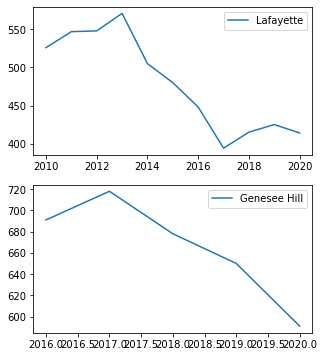

In [63]:
get_enrollment_history('Admiral','elementary')

Admiral: Madison


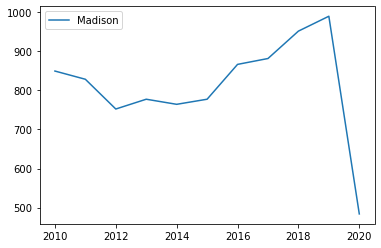

In [64]:
get_enrollment_history('Admiral','middle')

Uptown: John Hay


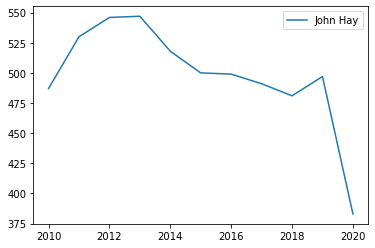

In [65]:
get_enrollment_history('Uptown','elementary')

Othello: Dearborn Park
Othello: Van Asselt
Othello: Martin Luther King Jr.
Othello: Wing Luke
Othello: Dunlap
Othello: Hawthorne


<Figure size 432x288 with 0 Axes>

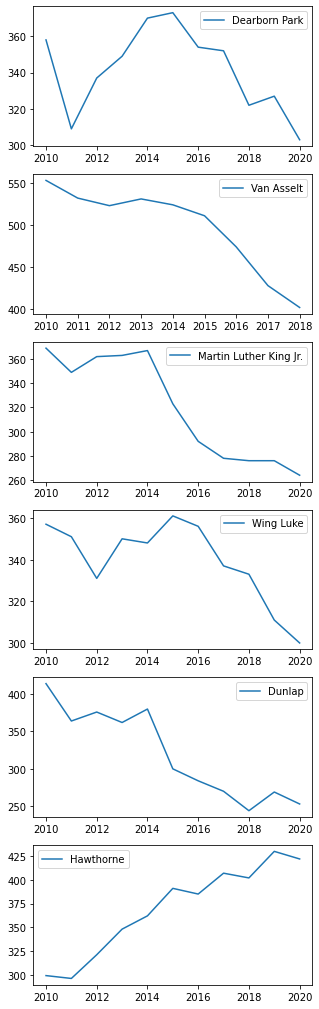

In [66]:
get_enrollment_history('Othello','elementary')

We can plot the trends in nearby schools given the name of the neighborhood and the school level we want to consider (elementary, middle, or high).  We see there are some dramatically different trends in schools near the same neighborhood.  For example, in Othello we have five schools with dramatically declining enrollment and one with dramatically increasing (though not enough to make up for five decreasing).  This is a very interesting trend and warrants further investigation.  

# TO DO: combined dash
- make it pretty, labels?
